In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from project import run

import seaborn as sb

# setting display options
%matplotlib inline
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
#windows
#my_path = r'.\data\insurance.db'

#linux
my_path = r'./data/insurance.db'


df = run(my_path, nb_exploration=True)

NaN values of "Area" column were imputed.
NaN values of "Education" column were imputed.
NaN values of "Children" column were imputed.
   Education  Salary Area Children     CMV  Claims  Motor  Household  Health  Life  Work_Compensation  Age  Customer_Years
ID                                                                                                                        
1       2.00    2177 1.00     1.00  380.97    0.39   0.57      -0.55   -0.29  0.24              -0.54   34              31
2       2.00     677 4.00     1.00 -131.13    1.12  -1.59       0.96   -0.69  0.00               1.75   21              35


In [6]:
df.head()

,Education,Salary,Area,Children,CMV,Claims,Motor,Household,Health,Life,Work_Compensation,Age,Customer_Years
ID,,,,,,,,,,,,,
1,2.00,2177,1.00,1.00,380.97,0.39,0.57,-0.55,-0.29,0.24,-0.54,34,31
2,2.00,677,4.00,1.00,-131.13,1.12,-1.59,0.96,-0.69,0.00,1.75,21,35
3,1.00,2277,3.00,0.00,504.67,0.28,-0.66,0.10,-0.58,1.27,1.57,46,25
4,3.00,1099,4.00,1.00,-16.99,0.99,-0.83,-0.71,1.92,-0.07,-0.24,35,26
5,3.00,1763,4.00,1.00,35.23,0.90,0.30,-0.69,0.20,-0.50,0.09,43,30


In [7]:
df.dtypes

Education            category
Salary                  int32
Area                 category
Children             category
CMV                   float64
Claims                float64
Motor                 float64
Household             float64
Health                float64
Life                  float64
Work_Compensation     float64
Age                     int64
Customer_Years          int64
dtype: object

In [8]:
df.isna().any().any()

False

In [9]:
premiums_cols = ["Motor", "Household", "Health", "Life", "Work_Compensation"]
categorical_cols = ["Area", "Education", "Children"]
df.columns

Index(['Education', 'Salary', 'Area', 'Children', 'CMV', 'Claims', 'Motor', 'Household', 'Health', 'Life', 'Work_Compensation', 'Age', 'Customer_Years'], dtype='object')

In [10]:
# Divide the variables into Value / Engage and Consumption / Affinity

ValueEngage = df[['Age',
               'Education',
               'Salary',
               'Area',
               'Children',
               'CMV',
               'Claims',
               'Customer_Years']]

ConsAff = df.loc[:,[ 'Motor',
               'Household',
               'Health',
               'Life',
               'Work_Compensation']].reindex()

In [11]:
# cols_for_clustering = []
# cols_for_clustering.extend(premiums_cols)
# cols_for_clustering.extend(categorical_cols)

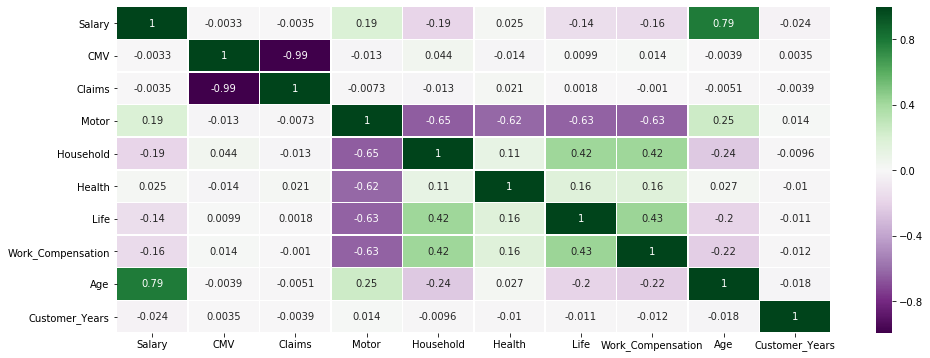

In [12]:
corr = df.corr(method='pearson')
# Obtain Correlation and plot it
plt.figure(figsize=(16,6))

h_map = sb.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='PRGn', annot=True, linewidths=.5)

#this is fix for matplotlib3.1.1 to ensure the top and bottom rows are not cut off.
# According to: https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
bottom, top = h_map.get_ylim()
h_map.set_ylim(bottom + 0.5, top - 0.5)


#display the plot.
plt.show()

In [13]:
# might be handy: https://github.com/joaolcorreia/RFM-analysis

In [14]:
from sklearn.preprocessing import StandardScaler
df[:] = StandardScaler().fit_transform(df[:])

x = df[df.columns.difference(categorical_cols + premiums_cols)].values # excluding categorical columns
x = x[:200] # slice array for faster cluster testing

[0.25630344 0.16278943 0.15338931 0.07915462 0.07722945 0.07601936
 0.04814968 0.04507846 0.04398135 0.03758441 0.01499983 0.00479379
 0.00052686]


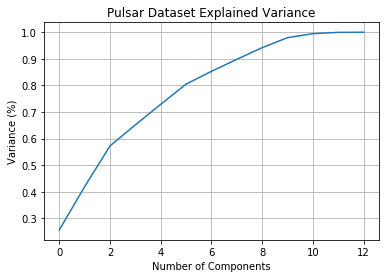

In [15]:
#importing PCA
from sklearn.decomposition import PCA


#Fitting the PCA algorithm with our Data
pca = PCA().fit(df)

print(pca.explained_variance_ratio_)


#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.grid()
plt.show()

In [16]:
#so 9 components explain 94.20951% of the variance
# so we will use 9 components

In [17]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5','principal component 6',
                                                                 'principal component 7','principal component 8',
                                                                 'principal component 9'])


In [18]:
print('Components: ', pca.components_)
print('Explained Variance: ', pca.explained_variance_)
print('Explained Variance Ratio: ', pca.explained_variance_ratio_)

Components:  [[ 3.46103241e-01  2.21911654e-01 -3.02698454e-03  4.47509550e-02
  -1.92244434e-02  6.57750311e-03  5.00509628e-01 -3.98150581e-01
  -2.13951092e-01 -3.90761719e-01 -3.94796026e-01  2.55217778e-01
   6.28753176e-03]
 [-6.08666499e-04  5.23143572e-01  2.68088680e-02 -5.50973532e-01
  -2.13448677e-02  2.23832473e-02 -1.83344178e-01  4.20530005e-02
   2.84687425e-01  8.72029610e-02  6.54193144e-02  5.40046654e-01
  -3.32921499e-02]
 [ 4.34430983e-03 -2.85267514e-02  8.20660425e-03  1.65783068e-02
  -7.05911843e-01  7.06048715e-01 -1.11095003e-02 -1.83382114e-02
   2.47845799e-02  4.99944721e-03  2.43815851e-03 -2.97835913e-02
  -4.10569479e-03]
 [-3.93819654e-01  2.12842852e-01  3.67992949e-01  2.39467973e-02
  -1.98384324e-02  2.40526322e-02  1.96859763e-01  2.09747186e-01
  -6.99304949e-01  1.56283205e-01  1.43105187e-01  1.65962073e-01
  -1.35711620e-01]
 [-3.95601208e-02  3.57130356e-02 -5.97672603e-01  2.66759430e-02
  -4.46688167e-03  4.12074882e-03  2.50700623e-02  2.

In [19]:
principalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,0.24,-1.21,-0.13,-0.30,0.71,-1.07,0.68,0.15,0.63
1,-2.64,-1.76,0.30,0.56,-1.15,0.19,-0.47,-0.02,-1.26
2,-2.15,0.89,-0.25,1.54,0.60,0.01,0.22,0.68,-0.23
3,-0.63,-0.69,0.28,-1.87,-0.43,2.06,0.42,0.26,0.13
4,0.58,-0.88,0.15,-0.34,-0.69,1.05,0.05,0.38,-0.46


In [20]:
#do we need to show the PCA some how? so I try to do with T-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(principalDf)

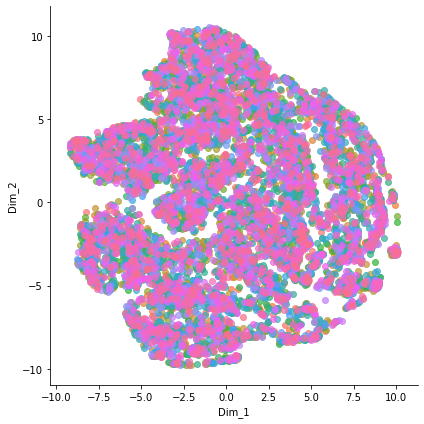

In [47]:

tsne_data = np.vstack((tsne_pca_results.T, principalDf.index)).T

tsne_df = pd.DataFrame(data=tsne_data, columns = ('Dim_1', 'Dim_2', 'label'))

sb.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2', alpha=.7)
plt.show()

array([[-1.1534737 ,  0.47199756],
       [-1.9778402 ,  7.3060255 ],
       [-3.174194  ,  2.572256  ],
       ...,
       [ 3.530734  , -0.3682284 ],
       [ 1.7976916 ,  7.6966715 ],
       [ 5.4608293 , -1.1877626 ]], dtype=float32)

In [ ]:
sb.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2', alpha=.7)
plt.show()

In [28]:
df_subset = df.copy()
df_subset = df_subset.T
df_subset['tsne-pca-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca-two'] = tsne_pca_results[:,1]

ax = plt.subplot(1,3,3)
sb.scatterplot(
    x='tsne-pca-one', y='tsne-pca-one',
    hue=df.columns,
    palette=sb.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3
)

ValueError: Length of values does not match length of index

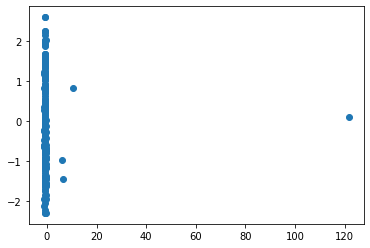

In [12]:
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.show()

In [29]:
from utils.preprocessing import remove_outliers, handle_nans

principalDf, pca_outliers = remove_outliers(principalDf, principalDf.columns)

In [30]:
pca_outliers

principal component 1     16
principal component 2      2
principal component 3     12
principal component 4     23
principal component 5      0
principal component 6      3
principal component 7     36
principal component 8    177
principal component 9    184
dtype: int64

In [31]:
principalDf = handle_nans(principalDf, principalDf.columns)

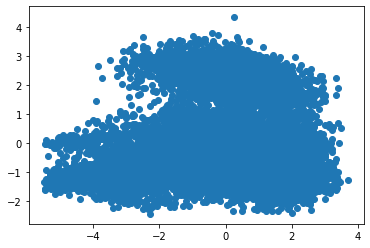

In [32]:
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1])
plt.show()

In [34]:
principalDf[:] = StandardScaler().fit_transform(principalDf[:])

x = principalDf.values

x

array([[ 0.12939062, -0.8428188 , -0.53555508, ...,  0.88566954,
         0.22404858,  0.92270461],
       [-1.46433078, -1.23005341,  1.67742551, ..., -0.61444893,
        -0.02492475, -1.88801251],
       [-1.1946699 ,  0.6267531 , -1.12729155, ...,  0.27713197,
         1.01219157, -0.35538504],
       ...,
       [ 0.76243853, -0.54677319, -1.18564248, ..., -0.07897321,
        -0.3602685 ,  0.24284556],
       [-1.31117421, -0.32475436,  0.16106791, ...,  1.83079934,
         0.93210653, -1.28063594],
       [ 1.00208214, -0.71949761, -0.91671925, ..., -1.17700965,
         0.33792894, -0.30278428]])

### K-Means Clustering

In [35]:
from sklearn.cluster import KMeans

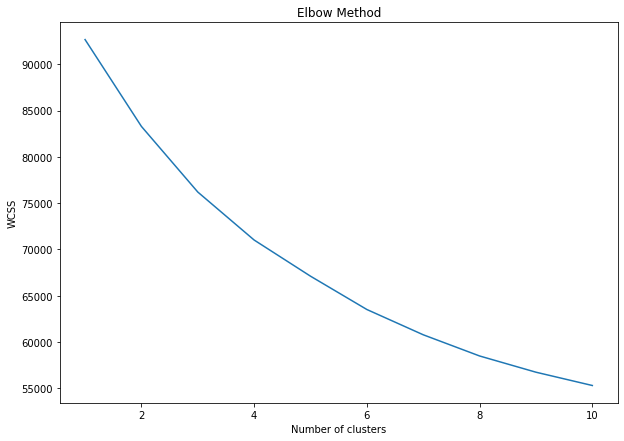

In [36]:
plt.figure(figsize=(10, 7))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
best_number_of_clusters = 3

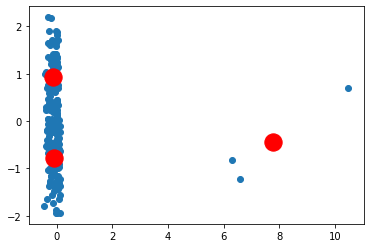

In [21]:
kmeans = KMeans(n_clusters=best_number_of_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Agglomerative Clustering

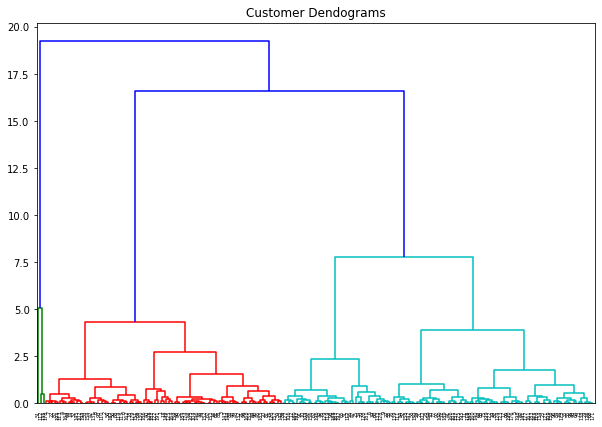

In [22]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [23]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(x)

array([2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 3, 3, 3, 1, 1, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 2, 1, 2, 2,
       2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 3,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 3, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 3, 2, 3, 1, 2, 2, 1, 1, 3, 3, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 1, 3, 1, 3, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2,
       2, 3, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 3, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 3, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 1, 3, 3,
       1, 1], dtype=int64)

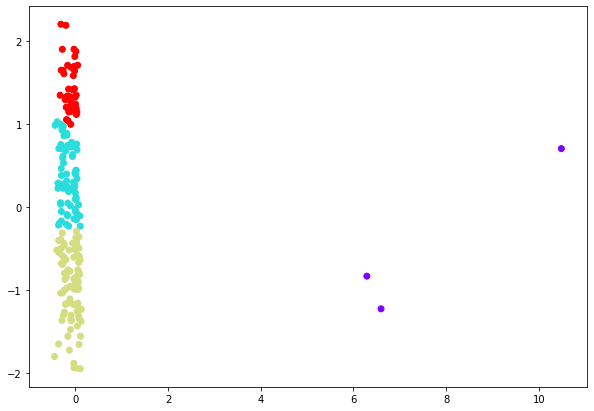

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(x[:,0], x[:,1], c=cluster.labels_, cmap='rainbow')

plt.show()

**TODO:**
- Recurrently remove outliers until `pca.explained_variance_ratio_` seems okay.